In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import camb
from tqdm.notebook import tqdm 

In [ ]:
def model_rs(ombh2,omch2,nnu, z_star):
  #Calculation of theoretical values with CAMB for rs/Dm, ombh2, omch2+ombh2
  camb_params = camb.CAMBparams()
  camb_params.set_cosmology(ombh2=ombh2,omch2=omch2-ombh2,nnu=nnu,num_massive_neutrinos=0,mnu=0,H0=70) 
  camb_result = camb.get_background(camb_params)
  rs = camb_result.sound_horizon(z_star)

  return rs

model_rs(0.022,0.12,3,1089)

np.float64(151.0346914955441)

  0%|          | 0/15 [00:00<?, ?it/s]

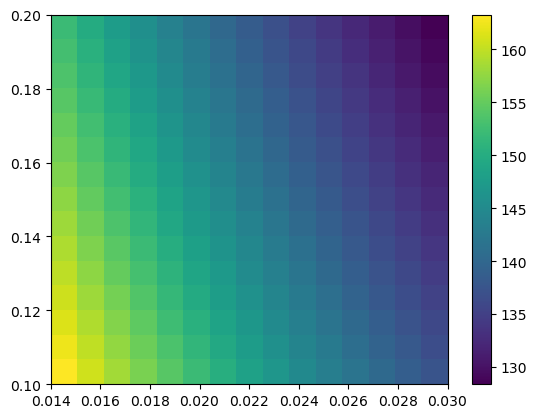

In [4]:
wb_limits=[0.014,0.03]
wbc_limits=[0.1,0.2]
Neff_limits=[3,3.1]

n_samples=15

grid=np.linspace(0,1,n_samples)
wb_grid=grid*(wb_limits[1]-wb_limits[0])+wb_limits[0]
wbc_grid=grid*(wbc_limits[1]-wbc_limits[0])+wbc_limits[0]
Neff_grid=grid*(Neff_limits[1]-Neff_limits[0])+Neff_limits[0]

wb_grid

n=0

#Calculation of the sound horizon for every point in the grid
rs=np.zeros(shape=(n_samples,n_samples,n_samples))
for i in tqdm(range(n_samples)):
  for j in range(n_samples):
    for k in range(n_samples):
      rs[i,j,k]=model_rs(wb_grid[i],wbc_grid[j],Neff_grid[k],1089)

plt.imshow(rs[:,:,0],origin='lower',aspect='auto',extent=[wb_limits[0],wb_limits[1],wbc_limits[0],wbc_limits[1]] )
plt.colorbar()

In [5]:
wb_ref=0.02236
wbc_ref=0.1432
Neff_ref=3.04
rs_ref=model_rs(wb_ref,wbc_ref-wb_ref,Neff_ref,1089)

In [6]:
def model_log_rs_analytica(theta, ombh2,ombch2,Neff):
  return (
    np.log10(rs_ref)
    + theta[0] * np.log10(ombh2 / wb_ref)
    + theta[1] * np.log10(ombch2 / wbc_ref)
    + theta[2] * np.log10(Neff / Neff_ref)
  )

In [7]:
ombh2,ombch2,Neff=np.meshgrid(wb_grid,wbc_grid-wb_grid,Neff_grid)
print(ombh2.shape,ombch2.shape,Neff.shape)
print(wb_grid.shape, rs.shape)

(15, 15, 15) (15, 15, 15) (15, 15, 15)
(15,) (15, 15, 15)


In [8]:
def func(theta, ombh2, ombch2, Neff, rs):
    return np.sum((model_log_rs_analytica(theta, ombh2, ombch2, Neff) - np.log10(rs)) ** 2)

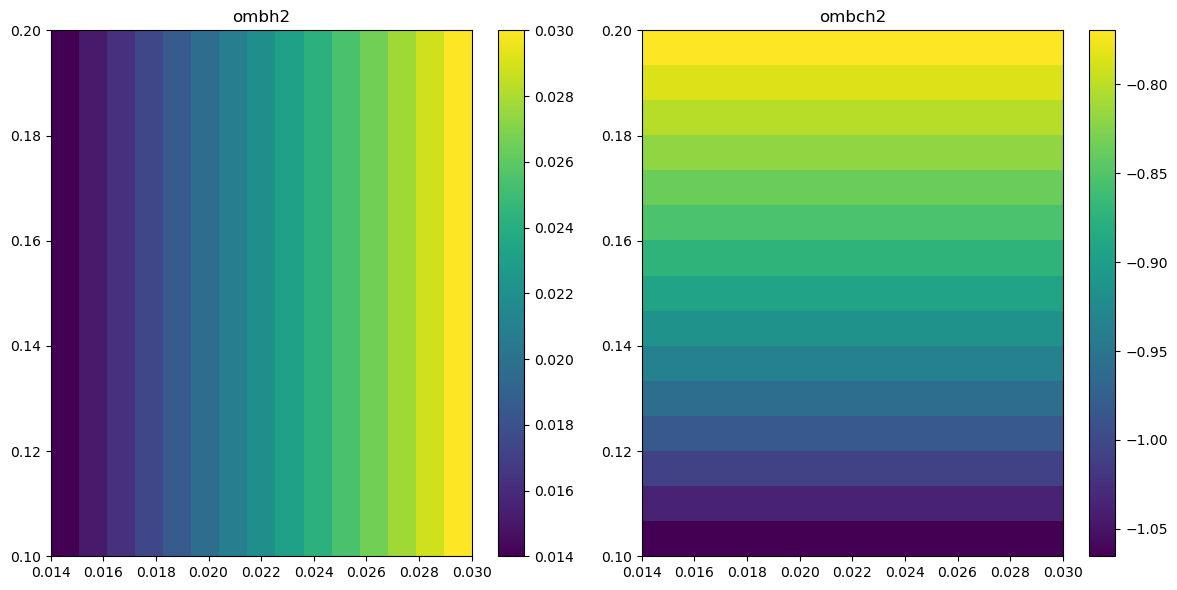

In [9]:
figure, ax = plt.subplots(1, 2, figsize=(12, 6))

im0 = ax[0].imshow(ombh2[:, :, 0], origin='lower', aspect='auto', extent=[wb_limits[0], wb_limits[1], wbc_limits[0], wbc_limits[1]])
figure.colorbar(im0, ax=ax[0])
ax[0].set_title("ombh2")

im1 = ax[1].imshow(np.log10(ombch2[:, :, 0]), origin='lower', aspect='auto', extent=[wb_limits[0], wb_limits[1], wbc_limits[0], wbc_limits[1]])
figure.colorbar(im1, ax=ax[1])
ax[1].set_title("ombch2")

figure.tight_layout()
plt.show()


[-0.18942365  0.03622698 -1.52900823]
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.012391312273896
        x: [-1.894e-01  3.623e-02 -1.529e+00]
      nit: 5
      jac: [-2.116e-06  1.222e-06  2.682e-07]
 hess_inv: [[ 1.417e-02 -1.226e-03  1.262e-02]
            [-1.226e-03  1.326e-02  4.922e-02]
            [ 1.262e-02  4.922e-02  7.164e+00]]
     nfev: 32
     njev: 8


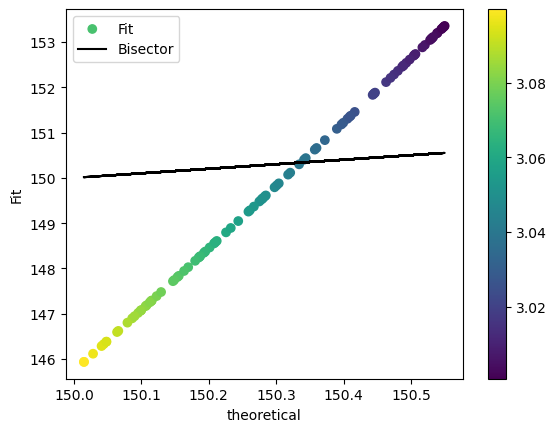

In [10]:
from scipy.optimize import minimize

func([-0.13,-0.23,-0.1],ombh2, ombch2,Neff,rs)

result = minimize(func, [-0.13, -0.23, -0.1], args=(ombh2, ombch2, Neff, rs))
print(result.x)
print(result)

Neff_random=np.random.uniform(Neff_limits[0],Neff_limits[1],100)
rs_random=np.array([model_rs(0.02236,0.1432-0.02236,Neff_random[i],1089) for i in range(100)])
rs_analytica=10**np.array([model_log_rs_analytica(result.x,wb_ref,wbc_ref,Neff_random[i]) for i in range(100)])

plt.scatter(rs_random,rs_analytica,label="Fit",c=Neff_random)
plt.colorbar()
plt.plot(rs_random,rs_random,label="Bisector", color="black")
plt.xlabel("theoretical")
plt.ylabel("Fit")
plt.legend()

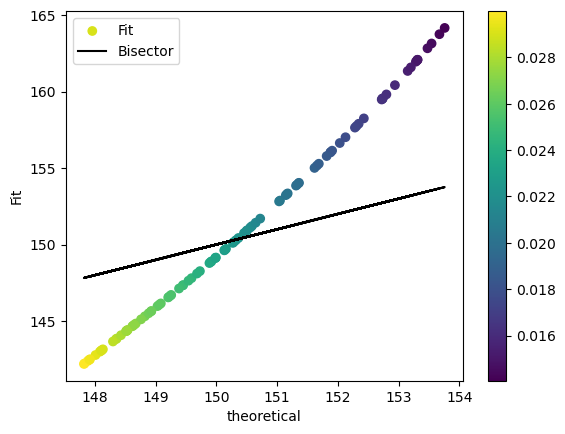

In [11]:
wb_random=np.random.uniform(wb_limits[0],wb_limits[1],100)
rs2_random=np.array([model_rs(wb_random[i],wbc_ref-wb_random[i],Neff_ref,1089) for i in range(100)])
rs2_analytica=10**np.array([model_log_rs_analytica(result.x,wb_random[i],wbc_ref,Neff_ref) for i in range(100)])

plt.scatter(rs2_random,rs2_analytica,label="Fit",c=wb_random)
plt.colorbar()
plt.plot(rs2_random,rs2_random,label="Bisector", color="black")
plt.xlabel("theoretical")
plt.ylabel("Fit")
plt.legend()

VERSIONE CORRETTA

In [4]:
import iminuit

def model_rs(ombh2,ombch2,nnu, z_star):
  #usa CAMB per calcolare 3 cose : rs/Dm, ombh2, omch2+ombh2 -->VALORI TEORICI
  camb_params = camb.CAMBparams()  #crea ogg dove si salvano i param cosmologici
  camb_params.set_cosmology(ombh2=ombh2,omch2=ombch2-ombh2,nnu=nnu,num_massive_neutrinos=0,mnu=0,H0=70)  #**params ="usa ogni chiave-valore come argomento della funzione"
  camb_result = camb.get_background(camb_params)  #calcola le grandezze cosmologiche di fondo (comov dist, orizzonte acustico,..)
  rs_star = camb_result.sound_horizon(z_star)

  return rs_star
  #rs/Dm è theta* del file di DESI

In [7]:
model_rs(0.022,0.14,3,1089)

np.float64(145.57805909819115)

In [8]:
wb_limits=[0.02,0.024]
wbc_limits=[0.1,0.18]
Neff_limits=[3,3.1]

n_samples=15
grid=np.linspace(0,1,n_samples)
wb_grid=grid*(wb_limits[1]-wb_limits[0])+wb_limits[0]
wbc_grid=grid*(wbc_limits[1]-wbc_limits[0])+wbc_limits[0]
Neff_grid=grid*(Neff_limits[1]-Neff_limits[0])+Neff_limits[0]

In [10]:
n=0
#ho fatto griglia,ora per ogni punto voglio calcolare sound horizon
rs=np.zeros(shape=(n_samples,n_samples,n_samples))  #devo fare n_samples alla terza, quindi se lo aumento ci mette più tempo
for i in tqdm(range(n_samples)):
  for j in range(n_samples):
    for k in range(n_samples):
      rs[i,j,k]=model_rs(wb_grid[i],wbc_grid[j],Neff_grid[k],1089)

  0%|          | 0/15 [00:00<?, ?it/s]

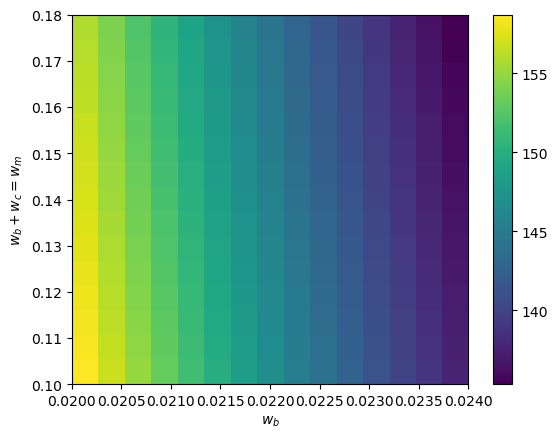

In [11]:
plt.imshow(rs[:,:,0],origin='lower',aspect='auto',extent=[wb_limits[0],wb_limits[1],wbc_limits[0],wbc_limits[1]] )#fisso num specie di neutrini
plt.xlabel(r"$w_b$")
plt.ylabel(r"$w_b+w_c=w_m$")
plt.colorbar()

In [12]:
wb_ref=0.02236
wbc_ref=0.1432
Neff_ref=3.04
rs_ref=model_rs(wb_ref,wbc_ref,Neff_ref,1089)

In [19]:
from scipy.optimize import minimize
def model_log_rs_analytica(theta, ombh2,ombch2,Neff):
  return np.log10(rs_ref)+theta[0]*np.log10(ombh2/wb_ref)+theta[1]*np.log10(ombch2/wbc_ref)+theta[2]*np.log10(Neff/Neff_ref)

In [20]:
def func(p1,p2,p3):
  log_rs_analytical=np.zeros(shape=(n_samples,n_samples,n_samples))
  for i in range(n_samples):
    for j in range(n_samples):
      for k in range(n_samples):
        log_rs_analytical[i,j,k]=model_log_rs_analytica([p1,p2,p3],wb_grid[i],wbc_grid[j],Neff_grid[k])
  return np.sum((log_rs_analytical-np.log10(rs))**2)

In [21]:
func(-0.13, -0.23, -0.1)

np.float64(0.008253712720433994)

In [22]:
from iminuit import Minuit as mm
mm=mm(func,p1=-0.13,p2=-0.23,p3=-0.1)  #esponenti di DESI

In [23]:
mm.migrad() #esponenti che minimizzano, da confrontare con quelli di DESI

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.0023                     │              Nfcn = 38               │
│ EDM = 3.13e-05 (Goal: 0.0002)    │            time = 1.7 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p1   │   -0.1    │    0.7    │            │            │         │         │       │
│ 1 │ p2   │   -0.24   │   0.22    │            │            │         │         │       │
│ 2 │ p3   │    -0     │     4     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬──────────────────────┐
│    │     p1     p2     p3 │
├────┼──────────────────────┤
│ p1 │  0.457  -0.01    0.2 │
│ p2 │  -0.01 0.0465   0.05 │
│ p3 │    0.2   0.05   14.1 │
└────┴──────────────────────┘

In [24]:
mm.values

<ValueView p1=-0.08995932387631335 p2=-0.23949893441846315 p3=-0.15143606884165434>

In [26]:
Neff_random=np.random.uniform(Neff_limits[0],Neff_limits[1],100)
rs_random=np.array([model_rs(wb_ref,wbc_ref,Neff_random[i],1089) for i in range(100)])

rs_analytical=10**np.array([model_log_rs_analytica(mm.values,wb_ref,wbc_ref,Neff_random[i]) for i in tqdm(range(100))])

  0%|          | 0/100 [00:00<?, ?it/s]

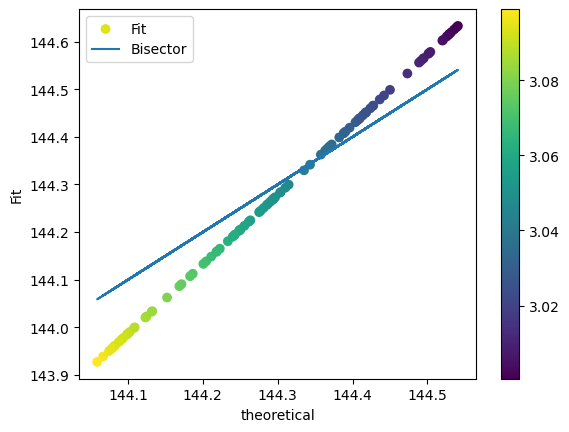

In [27]:
cb=plt.scatter(rs_random,rs_analytical,label="Fit",c=Neff_random)
plt.colorbar(cb)
plt.plot(rs_random,rs_random,label="Bisector")
plt.xlabel("theoretical")
plt.ylabel("Fit")
plt.legend()

In [29]:
wb_random=np.random.uniform(wb_limits[0],wb_limits[1],100)
rs2_random=np.array([model_rs(wb_random[i],wbc_ref,Neff_ref,1089) for i in range(100)])

rs_analytical=10**np.array([model_log_rs_analytica(mm.values,wb_random[i],wbc_ref,Neff_ref) for i in tqdm(range(100))])

  0%|          | 0/100 [00:00<?, ?it/s]

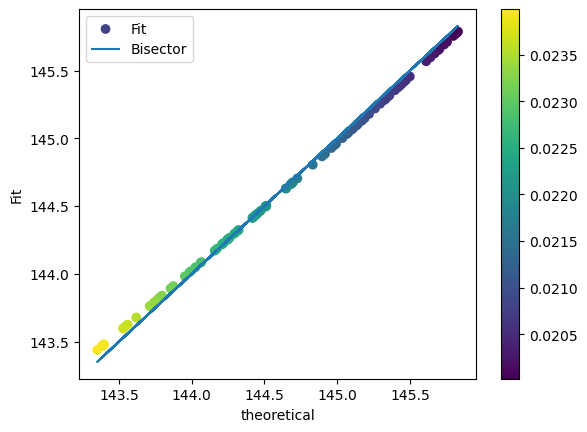

In [30]:
cb=plt.scatter(rs2_random,rs_analytical,label="Fit",c=wb_random)
plt.colorbar(cb)
plt.plot(rs2_random,rs2_random,label="Bisector")
plt.xlabel("theoretical")
plt.ylabel("Fit")
plt.legend()

In [ ]:
wbc_random=np.random.uniform(wbc_limits[0],wbc_limits[1],100)
rs3_random=np.array([model_rs(wb_ref,wbc_random[i],Neff_ref,1089) for i in range(100)])
rs_analytical=10**np.array([model_log_rs_analytica(mm.values,wb_ref,wbc_random[i],Neff_ref) for i in tqdm(range(100))])

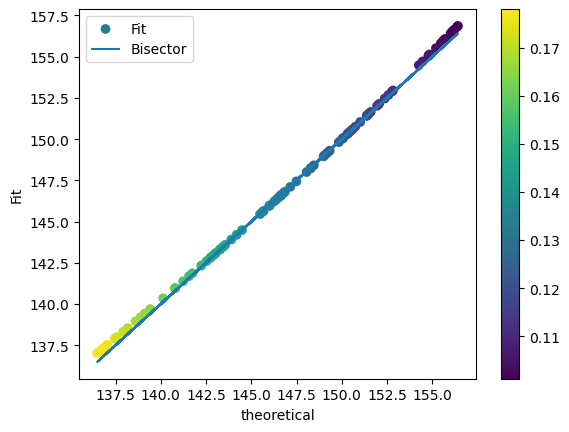

In [33]:
cb=plt.scatter(rs3_random,rs_analytical,label="Fit",c=wbc_random)
plt.colorbar(cb)
plt.plot(rs3_random,rs3_random,label="Bisector")
plt.xlabel("theoretical")
plt.ylabel("Fit")
plt.legend()

In [ ]:
#funziona bene per omega_m e dato che uso per fare fit cmb-->info (prior) stretta su omega_b e su omega_m, posso sostituire le info ricavate, non ci sono errori sistematici grandi. 
# Non sempre ho prior stretta però !!! quindi si può pensare ad altri metodi,come ad esempio reti neurali.
# Reti neurali sono legate a machine learning. ML bypassa la teoria, guarda i dati e migliora la formula di partenza. 
# Con questo prog ho dato io una forma funzionale, il passaggio successivo è far migliorare la forma funzionale con i dati,la macchina impara da sola, in modo che sia veloce. 
# Emulatori sono applicazione delle reti neurali che da serie di parametri emulano soluzioni complesse risolvendo in modo semplice e veloce. Ho due scelte quindi: buona precisione e tanto tempo, oppure minor precisione e poco tempo. 
# Se scelgo seconda, ovvero emulatore, devo dare tanti dati in modo che macchina impari da sola. Poi la formula che ottengo finale la posso usare in qualunque contesto (likelihood, ..).